<a href="https://colab.research.google.com/github/masterinfo/COURS_ELEARNING/blob/master/inceptionv3_hubVSnoHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pylab as plt
import datetime

In [81]:
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

In [82]:
data_dir

'/root/.keras/datasets/flower_photos'

In [83]:
!ls -lrt /root/.keras/datasets/flower_photos

total 620
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  45056 Feb 10  2016 tulips
drwx------ 2 270850 5000  36864 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  57344 Feb 10  2016 dandelion
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy


In [84]:
img_height = 224
img_width = 224
BATCH_SIZE = 128 
img_height2 = 299
img_width2 = 299
 

In [85]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_dir),
  validation_split=0.2,
  subset="training",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_dir),
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [86]:
train_ds2 = tf.keras.utils.image_dataset_from_directory(
  str(data_dir),
  validation_split=0.2,
  subset="training",
  seed=1,
  image_size=(img_height2, img_width2),
  batch_size=BATCH_SIZE
)

val_ds2 = tf.keras.utils.image_dataset_from_directory(
  str(data_dir),
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(img_height2, img_width2),
  batch_size=BATCH_SIZE
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [87]:
len(val_ds)


6

In [88]:
print(6*128)

768


In [89]:
class_names = np.array(train_ds.class_names)
print(class_names)
NUM_CLASSES = len(class_names)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [90]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) 
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) 

In [91]:
train_ds2 = train_ds2.map(lambda x, y: (normalization_layer(x), y)) 
val_ds2 = val_ds2.map(lambda x, y: (normalization_layer(x), y)) 

In [92]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [93]:
train_ds2 = train_ds2.cache().prefetch(buffer_size=AUTOTUNE)
val_ds2 = val_ds2.cache().prefetch(buffer_size=AUTOTUNE)

In [94]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 224, 224, 3)
(128,)


In [95]:
for image_batch2, labels_batch2 in train_ds2:
  print(image_batch2.shape)
  print(labels_batch2.shape)
  break

(128, 299, 299, 3)
(128,)


**model inception V3 from hub tf**

In [96]:
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = inception_v3

IMAGE_SHAPE = (224, 224)

model_inception_hub= hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,),trainable=False)


model1_hub = tf.keras.Sequential([
      model_inception_hub,
      tf.keras.layers.Dense(NUM_CLASSES)
])

labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

 
 

In [97]:
print("_________________________________________________________________")
print(model1_hub.summary())

_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              23853833  
                                                                 
 dense_9 (Dense)             (None, 5)                 5010      
                                                                 
Total params: 23,858,843
Trainable params: 5,010
Non-trainable params: 23,853,833
_________________________________________________________________
None


In [98]:
NUM_CLASSES

5

In [99]:
pred = model1_hub(image_batch) 
pred.shape

TensorShape([128, 5])

model inception V3 from kers ( no hub  with top)

In [100]:
IMAGE_SHAPE2 = (299, 299)

base_model2 = tf.keras.applications.InceptionV3(input_shape=IMAGE_SHAPE2+(3,),
                                                 include_top=True,
                                                    weights='imagenet' )
# for layer in base_model2.layers:
#     layer.trainable = False

base_model2.trainable=False

model2 = tf.keras.Sequential([
  base_model2,
  tf.keras.layers.Dense(NUM_CLASSES)
])
print(model2.summary())# top = true

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1000)              23851784  
                                                                 
 dense_10 (Dense)            (None, 5)                 5005      
                                                                 
Total params: 23,856,789
Trainable params: 5,005
Non-trainable params: 23,851,784
_________________________________________________________________
None


*model3 avec top = false et dropout car model2 vraiment mauvais* ???? lt top n'est pas le meme ???



In [101]:

from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D,Dropout,Dense

base_model3 = tf.keras.applications.InceptionV3(input_shape=IMAGE_SHAPE2+(3,),
                                                 include_top=False,
                                                    weights='imagenet')
base_model3.trainable = False

add_model = Sequential()
add_model.add(base_model3)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(NUM_CLASSES,   activation='softmax'))

model3 = add_model

print(model3.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_8 (Dropout)         (None, 2048)              0         
                                                                 
 dense_11 (Dense)            (None, 5)                 10245     
                                                                 
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________
None


model4 avec top = false et flatten dropout car model2 vraiment mauvais ?? 

In [102]:
import tensorflow as tf
from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Dense, Flatten, Input


base_model4=tf.keras.applications.inception_v3.InceptionV3(input_shape=IMAGE_SHAPE2+(3,),weights='imagenet', include_top=False)
base_model4.trainable=False

model4 = tf.keras.Sequential([
    base_model4,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_CLASSES , activation='softmax')
    
])

print(model4.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_9 (Dropout)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 5)                 10245     
                                                                 
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________
None


In [103]:
pred4 = model4(image_batch2) 
pred4.shape

TensorShape([128, 5])

In [104]:
pred3 = model3(image_batch2) 
pred3.shape

TensorShape([128, 5])

In [105]:
pred2 = model2(image_batch2) 
pred2.shape

TensorShape([128, 5])

**Train model1 from hub tf**

In [106]:
NUM_EPOCHS = 20

model1_hub.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model1_hub.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS).history

Epoch 1/20
23/23 [==============================] - 14s 334ms/step - loss: 1.5376 - acc: 0.5153 - val_loss: 0.8624 - val_acc: 0.7275
Epoch 2/20
23/23 [==============================] - 4s 180ms/step - loss: 0.6386 - acc: 0.7830 - val_loss: 0.6559 - val_acc: 0.7902
Epoch 3/20
23/23 [==============================] - 4s 180ms/step - loss: 0.4886 - acc: 0.8297 - val_loss: 0.5818 - val_acc: 0.8174
Epoch 4/20
23/23 [==============================] - 4s 181ms/step - loss: 0.4152 - acc: 0.8552 - val_loss: 0.5493 - val_acc: 0.8297
Epoch 5/20
23/23 [==============================] - 4s 181ms/step - loss: 0.3666 - acc: 0.8716 - val_loss: 0.5302 - val_acc: 0.8338
Epoch 6/20
23/23 [==============================] - 4s 181ms/step - loss: 0.3309 - acc: 0.8866 - val_loss: 0.5159 - val_acc: 0.8392
Epoch 7/20
23/23 [==============================] - 4s 180ms/step - loss: 0.3032 - acc: 0.8975 - val_loss: 0.5052 - val_acc: 0.8447
Epoch 8/20
23/23 [==============================] - 4s 181ms/step - loss: 0

**Train model2 no hub tf  with top**

In [107]:
NUM_EPOCHS = 20

model2.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history2 = model2.fit(train_ds2,
                    validation_data=val_ds2,
                    epochs=NUM_EPOCHS).history

Epoch 1/20
23/23 [==============================] - 18s 565ms/step - loss: 1.5934 - acc: 0.4424 - val_loss: 1.5842 - val_acc: 0.5286
Epoch 2/20
23/23 [==============================] - 8s 333ms/step - loss: 1.5790 - acc: 0.5044 - val_loss: 1.5692 - val_acc: 0.5668
Epoch 3/20
23/23 [==============================] - 7s 322ms/step - loss: 1.5652 - acc: 0.5310 - val_loss: 1.5548 - val_acc: 0.5777
Epoch 4/20
23/23 [==============================] - 7s 321ms/step - loss: 1.5519 - acc: 0.5494 - val_loss: 1.5409 - val_acc: 0.5858
Epoch 5/20
23/23 [==============================] - 7s 324ms/step - loss: 1.5389 - acc: 0.5562 - val_loss: 1.5274 - val_acc: 0.5995
Epoch 6/20
23/23 [==============================] - 7s 323ms/step - loss: 1.5263 - acc: 0.5572 - val_loss: 1.5143 - val_acc: 0.6008
Epoch 7/20
23/23 [==============================] - 7s 324ms/step - loss: 1.5140 - acc: 0.5603 - val_loss: 1.5016 - val_acc: 0.6035
Epoch 8/20
23/23 [==============================] - 7s 322ms/step - loss: 1

Train model3 no hub tf with top=false  and dropout

In [108]:
NUM_EPOCHS = 20

model3.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history3 = model3.fit(train_ds2,
                    validation_data=val_ds2,
                    epochs=NUM_EPOCHS).history

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - 13s 374ms/step - loss: 1.1409 - acc: 0.5446 - val_loss: 0.6338 - val_acc: 0.8106
Epoch 2/20
23/23 [==============================] - 7s 322ms/step - loss: 0.6457 - acc: 0.7674 - val_loss: 0.4922 - val_acc: 0.8379
Epoch 3/20
23/23 [==============================] - 7s 323ms/step - loss: 0.5296 - acc: 0.8103 - val_loss: 0.4308 - val_acc: 0.8665
Epoch 4/20
23/23 [==============================] - 7s 327ms/step - loss: 0.4632 - acc: 0.8403 - val_loss: 0.3953 - val_acc: 0.8760
Epoch 5/20
23/23 [==============================] - 7s 323ms/step - loss: 0.4406 - acc: 0.8437 - val_loss: 0.3719 - val_acc: 0.8842
Epoch 6/20
23/23 [==============================] - 7s 323ms/step - loss: 0.3917 - acc: 0.8604 - val_loss: 0.3566 - val_acc: 0.8883
Epoch 7/20
23/23 [==============================] - 7s 324ms/step - loss: 0.3847 - acc: 0.8665 - val_loss: 0.3397 - val_acc: 0.8937
Epoch 8/20
23/23 [==============================] - 7s 323ms/step - loss: 0.3573 - acc

Train model4 no hub tf with top=false and dropou

In [109]:
NUM_EPOCHS = 20

model4.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


 

In [110]:
history4 = model4.fit(train_ds2,
                    validation_data=val_ds2,
                    epochs=NUM_EPOCHS).history

Epoch 1/20
23/23 [==============================] - 12s 375ms/step - loss: 1.0681 - acc: 0.5964 - val_loss: 0.6463 - val_acc: 0.8052
Epoch 2/20
23/23 [==============================] - 7s 323ms/step - loss: 0.5727 - acc: 0.8116 - val_loss: 0.4841 - val_acc: 0.8488
Epoch 3/20
23/23 [==============================] - 7s 324ms/step - loss: 0.4497 - acc: 0.8512 - val_loss: 0.4257 - val_acc: 0.8774
Epoch 4/20
23/23 [==============================] - 7s 323ms/step - loss: 0.3956 - acc: 0.8808 - val_loss: 0.3904 - val_acc: 0.8869
Epoch 5/20
23/23 [==============================] - 7s 322ms/step - loss: 0.3572 - acc: 0.8839 - val_loss: 0.3665 - val_acc: 0.8842
Epoch 6/20
23/23 [==============================] - 7s 323ms/step - loss: 0.3282 - acc: 0.8879 - val_loss: 0.3462 - val_acc: 0.8910
Epoch 7/20
23/23 [==============================] - 7s 324ms/step - loss: 0.2966 - acc: 0.9104 - val_loss: 0.3325 - val_acc: 0.8992
Epoch 8/20
23/23 [==============================] - 7s 323ms/step - loss: 0

**Visualization model from model 1 from hub tf**

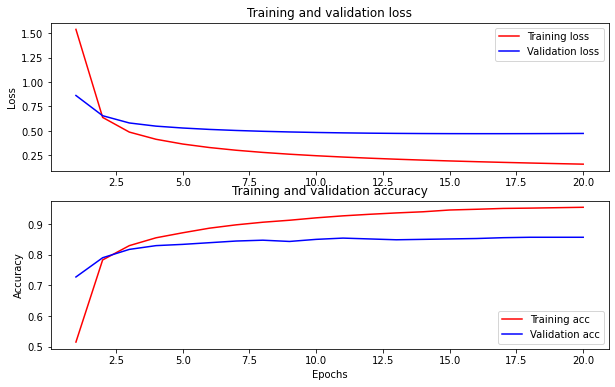

In [111]:
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Visualization model3 keras no top with dropout tf

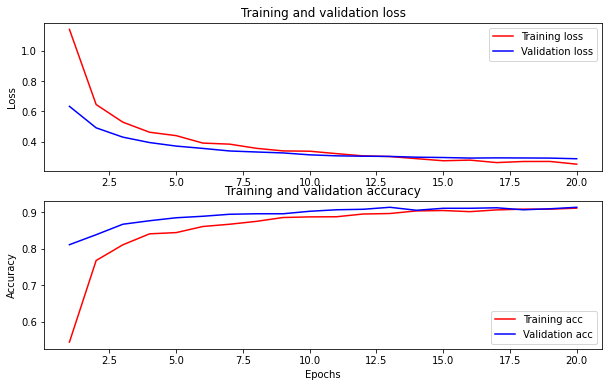

In [112]:
acc = history3['acc']
val_acc = history3['val_acc']
loss = history3['loss']
val_loss = history3['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

**Visualization model4 keras no top with dropout tf**

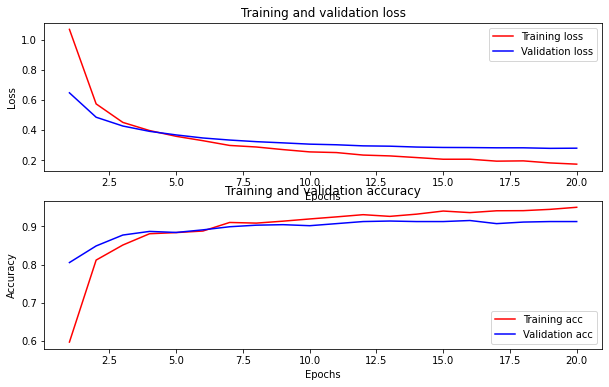

In [113]:
acc = history4['acc']
val_acc = history4['val_acc']
loss = history4['loss']
val_loss = history4['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Check predictions


In [114]:
image_batch4, labels4 = next(iter(val_ds2))

predicted_batch4 = model4.predict(image_batch4)
predicted_batch4

array([[3.84069244e-05, 2.50879548e-05, 5.88121545e-03, 7.01497600e-04,
        9.93353844e-01],
       [1.08086644e-03, 4.92938748e-03, 8.95904064e-01, 8.07392895e-02,
        1.73463617e-02],
       [2.67852447e-04, 9.97695267e-01, 1.47859551e-04, 4.97377361e-04,
        1.39169977e-03],
       [9.96248066e-01, 3.59814934e-04, 3.98660486e-05, 3.25292558e-03,
        9.93212234e-05],
       [6.50681555e-03, 5.50696909e-01, 1.54843675e-02, 4.03009623e-01,
        2.43022945e-02],
       [6.56422274e-03, 4.86967945e-03, 3.28697916e-03, 5.28468704e-03,
        9.79994416e-01],
       [6.00969745e-03, 1.38009724e-03, 9.15488490e-05, 9.92383063e-01,
        1.35611495e-04],
       [9.74073827e-01, 3.17243300e-03, 8.81426749e-05, 1.78827066e-02,
        4.78279265e-03],
       [7.80671893e-04, 1.67263817e-04, 1.48488462e-01, 8.53230059e-03,
        8.42031300e-01],
       [5.10416506e-03, 1.81332715e-02, 9.46555738e-05, 9.75307167e-01,
        1.36079395e-03],
       [6.54719304e-03, 2.6934

In [115]:
image_batch3, labels3 = next(iter(val_ds2))
predicted_batch3 = model3.predict(image_batch3)
predicted_batch3
 

array([[4.05063802e-05, 2.80791774e-05, 8.90902523e-03, 1.17311138e-03,
        9.89849210e-01],
       [1.05353468e-03, 3.98790184e-03, 8.91617835e-01, 8.70486423e-02,
        1.62921045e-02],
       [3.37790843e-04, 9.97381985e-01, 2.90551165e-04, 9.71813395e-04,
        1.01793359e-03],
       [9.95382249e-01, 5.65481430e-04, 5.08711564e-05, 3.88037902e-03,
        1.20856035e-04],
       [1.18389865e-02, 5.72946846e-01, 3.08562052e-02, 3.43505353e-01,
        4.08525877e-02],
       [6.27579819e-03, 4.55533294e-03, 3.79457930e-03, 5.34256129e-03,
        9.80031729e-01],
       [8.45507625e-03, 3.07144155e-03, 1.24561950e-04, 9.88160253e-01,
        1.88677936e-04],
       [9.69864607e-01, 5.11040771e-03, 1.02230624e-04, 2.13790908e-02,
        3.54371639e-03],
       [9.49439651e-04, 3.56675911e-04, 2.85466313e-01, 2.09553130e-02,
        6.92272305e-01],
       [6.07021246e-03, 2.65927073e-02, 1.71240565e-04, 9.65867460e-01,
        1.29847706e-03],
       [5.52182226e-03, 3.6751

In [116]:
image_batch, labels = next(iter(val_ds))

predicted_batch = model1_hub.predict(image_batch)
predicted_batch

array([[-7.2000699e+00, -1.8687313e+00,  9.6788239e-01, -3.3130341e+00,
         8.3255215e+00],
       [-2.4552295e+00, -3.9384425e+00,  4.7403817e+00,  2.3430676e+00,
         2.0306859e+00],
       [-1.8496352e+00,  4.7987075e+00, -1.1722902e+00, -2.4848769e+00,
        -1.6484494e+00],
       [ 9.6503954e+00,  3.7876353e-01, -4.7249203e+00,  1.3149329e+00,
        -2.9354198e+00],
       [-4.9533997e+00,  1.4786161e+00, -1.3875544e+00,  4.3114610e+00,
        -7.2512782e-01],
       [-1.9576937e+00, -2.9265182e+00,  1.8551627e-01, -4.6086985e-01,
         4.7939119e+00],
       [ 6.9185472e-01,  1.3162953e+00, -7.0011832e-02,  8.0313101e+00,
        -4.4152226e+00],
       [ 5.8336492e+00,  8.2550502e-01, -3.6604064e+00,  1.2325921e+00,
         6.2353396e-01],
       [-4.6232295e+00, -5.9969811e+00,  1.2597393e+00, -1.3147172e+00,
         3.6679075e+00],
       [ 6.1122119e-01,  1.9731052e+00, -6.0379577e-01,  6.5301142e+00,
        -2.2669549e+00],
       [-6.4609437e+00, -5.429

In [117]:
predicted_batch.shape

(128, 5)

In [118]:
labels3

<tf.Tensor: shape=(128,), dtype=int32, numpy=
array([4, 2, 1, 0, 1, 4, 3, 0, 4, 3, 4, 4, 3, 4, 3, 4, 1, 2, 2, 0, 1, 1,
       1, 2, 2, 0, 4, 1, 1, 2, 1, 3, 2, 0, 1, 2, 2, 3, 3, 1, 1, 4, 4, 1,
       3, 0, 0, 0, 4, 4, 0, 1, 4, 1, 4, 4, 3, 4, 0, 0, 4, 4, 3, 2, 4, 2,
       2, 4, 3, 0, 1, 4, 3, 1, 1, 3, 2, 2, 0, 2, 4, 3, 1, 1, 2, 2, 4, 3,
       1, 4, 1, 2, 3, 2, 4, 0, 3, 0, 2, 4, 4, 1, 3, 2, 4, 1, 1, 1, 3, 3,
       4, 1, 4, 0, 3, 4, 1, 3, 1, 4, 1, 0, 0, 0, 2, 4, 0, 4], dtype=int32)>

In [119]:
labels

<tf.Tensor: shape=(128,), dtype=int32, numpy=
array([4, 2, 1, 0, 1, 4, 3, 0, 4, 3, 4, 4, 3, 4, 3, 4, 1, 2, 2, 0, 1, 1,
       1, 2, 2, 0, 4, 1, 1, 2, 1, 3, 2, 0, 1, 2, 2, 3, 3, 1, 1, 4, 4, 1,
       3, 0, 0, 0, 4, 4, 0, 1, 4, 1, 4, 4, 3, 4, 0, 0, 4, 4, 3, 2, 4, 2,
       2, 4, 3, 0, 1, 4, 3, 1, 1, 3, 2, 2, 0, 2, 4, 3, 1, 1, 2, 2, 4, 3,
       1, 4, 1, 2, 3, 2, 4, 0, 3, 0, 2, 4, 4, 1, 3, 2, 4, 1, 1, 1, 3, 3,
       4, 1, 4, 0, 3, 4, 1, 3, 1, 4, 1, 0, 0, 0, 2, 4, 0, 4], dtype=int32)>

In [120]:
labels4

<tf.Tensor: shape=(128,), dtype=int32, numpy=
array([4, 2, 1, 0, 1, 4, 3, 0, 4, 3, 4, 4, 3, 4, 3, 4, 1, 2, 2, 0, 1, 1,
       1, 2, 2, 0, 4, 1, 1, 2, 1, 3, 2, 0, 1, 2, 2, 3, 3, 1, 1, 4, 4, 1,
       3, 0, 0, 0, 4, 4, 0, 1, 4, 1, 4, 4, 3, 4, 0, 0, 4, 4, 3, 2, 4, 2,
       2, 4, 3, 0, 1, 4, 3, 1, 1, 3, 2, 2, 0, 2, 4, 3, 1, 1, 2, 2, 4, 3,
       1, 4, 1, 2, 3, 2, 4, 0, 3, 0, 2, 4, 4, 1, 3, 2, 4, 1, 1, 1, 3, 3,
       4, 1, 4, 0, 3, 4, 1, 3, 1, 4, 1, 0, 0, 0, 2, 4, 0, 4], dtype=int32)>

In [121]:
class_names

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

**visualization images prediction first batch with model1 hub**

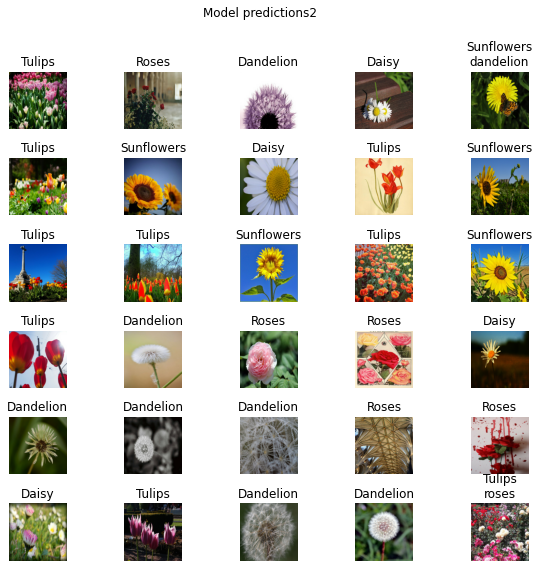

In [122]:
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
nb_error=0
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  pred= predicted_label_batch[n].title()
  lab =class_names[labels[n]]
  # print("_______________")
  # print( pred  )
  # print(lab)
  if pred.upper()==lab.upper():
    plt.title(pred)
  else:
    nb_error+=1
    plt.title(pred +"\n"+lab)
  
  plt.axis('off')
_ = plt.suptitle("Model predictions" + str(nb_error))



visualization images prediction first batch with model3

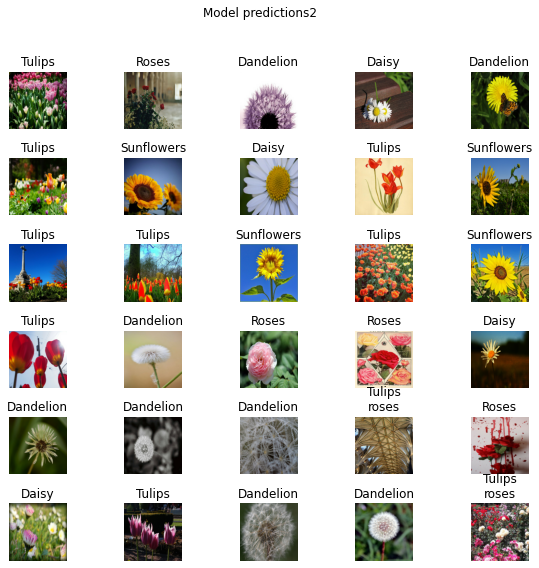

In [123]:
predicted_id3 = tf.math.argmax(predicted_batch3, axis=-1)
predicted_label_batch3 = class_names[predicted_id3]

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
nb_error=0
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  pred3= predicted_label_batch3[n].title()
  lab =class_names[labels3[n]]
  # print("_______________")
  # print( pred  )
  # print(lab)
  if pred3.upper()==lab.upper():
    plt.title(pred3)
  else:
    nb_error+=1
    plt.title(pred +"\n"+lab)
  
  plt.axis('off')
_ = plt.suptitle("Model predictions" + str(nb_error))

visualization images prediction first batch with model4

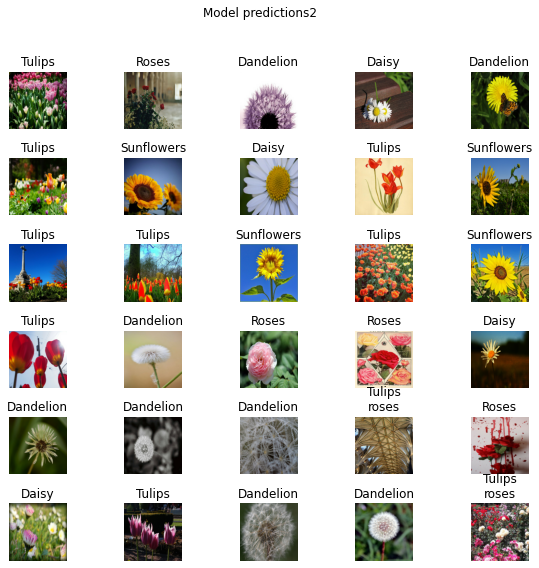

In [124]:
predicted_id4 = tf.math.argmax(predicted_batch4, axis=-1)
predicted_label_batch4 = class_names[predicted_id4]

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
nb_error=0
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  pred4= predicted_label_batch4[n].title()
  lab =class_names[labels4[n]]
  # print("_______________")
  # print( pred  )
  # print(lab)
  if pred4.upper()==lab.upper():
    plt.title(pred4)
  else:
    nb_error+=1
    plt.title(pred +"\n"+lab)
  
  plt.axis('off')
_ = plt.suptitle("Model predictions" + str(nb_error))

In [125]:
 
image_batch, labels = next(iter(val_ds))

predicted_batch = model1_hub.predict(image_batch)
predicted_batch

array([[-7.2000699e+00, -1.8687313e+00,  9.6788239e-01, -3.3130341e+00,
         8.3255215e+00],
       [-2.4552295e+00, -3.9384425e+00,  4.7403817e+00,  2.3430676e+00,
         2.0306859e+00],
       [-1.8496352e+00,  4.7987075e+00, -1.1722902e+00, -2.4848769e+00,
        -1.6484494e+00],
       [ 9.6503954e+00,  3.7876353e-01, -4.7249203e+00,  1.3149329e+00,
        -2.9354198e+00],
       [-4.9533997e+00,  1.4786161e+00, -1.3875544e+00,  4.3114610e+00,
        -7.2512782e-01],
       [-1.9576937e+00, -2.9265182e+00,  1.8551627e-01, -4.6086985e-01,
         4.7939119e+00],
       [ 6.9185472e-01,  1.3162953e+00, -7.0011832e-02,  8.0313101e+00,
        -4.4152226e+00],
       [ 5.8336492e+00,  8.2550502e-01, -3.6604064e+00,  1.2325921e+00,
         6.2353396e-01],
       [-4.6232295e+00, -5.9969811e+00,  1.2597393e+00, -1.3147172e+00,
         3.6679075e+00],
       [ 6.1122119e-01,  1.9731052e+00, -6.0379577e-01,  6.5301142e+00,
        -2.2669549e+00],
       [-6.4609437e+00, -5.429

In [126]:
predicted_batch.shape

(128, 5)

In [127]:
labels

<tf.Tensor: shape=(128,), dtype=int32, numpy=
array([4, 2, 1, 0, 1, 4, 3, 0, 4, 3, 4, 4, 3, 4, 3, 4, 1, 2, 2, 0, 1, 1,
       1, 2, 2, 0, 4, 1, 1, 2, 1, 3, 2, 0, 1, 2, 2, 3, 3, 1, 1, 4, 4, 1,
       3, 0, 0, 0, 4, 4, 0, 1, 4, 1, 4, 4, 3, 4, 0, 0, 4, 4, 3, 2, 4, 2,
       2, 4, 3, 0, 1, 4, 3, 1, 1, 3, 2, 2, 0, 2, 4, 3, 1, 1, 2, 2, 4, 3,
       1, 4, 1, 2, 3, 2, 4, 0, 3, 0, 2, 4, 4, 1, 3, 2, 4, 1, 1, 1, 3, 3,
       4, 1, 4, 0, 3, 4, 1, 3, 1, 4, 1, 0, 0, 0, 2, 4, 0, 4], dtype=int32)>

**on all validation datas with model1 hub**

tf.Tensor(
[4 2 1 0 1 4 3 0 4 3 4 4 3 4 3 4 1 2 2 0 1 1 1 2 2 0 4 1 1 2 1 3 2 0 1 2 2
 3 3 1 1 4 4 1 3 0 0 0 4 4 0 1 4 1 4 4 3 4 0 0 4 4 3 2 4 2 2 4 3 0 1 4 3 1
 1 3 2 2 0 2 4 3 1 1 2 2 4 3 1 4 1 2 3 2 4 0 3 0 2 4 4 1 3 2 4 1 1 1 3 3 4
 1 4 0 3 4 1 3 1 4 1 0 0 0 2 4 0 4], shape=(128,), dtype=int32)
nb errors 1
nb errors 2
_____________________________________
31
30
_____________________________________
_____________________________________
32
31
_____________________________________
_____________________________________
33
32
_____________________________________
_____________________________________
34
33
_____________________________________
_____________________________________
35
34
_____________________________________
_____________________________________
36
35
_____________________________________
nb errors 3
_____________________________________
_____________________________________
37
36
_____________________________________
nb errors 4
_____________________________________
__

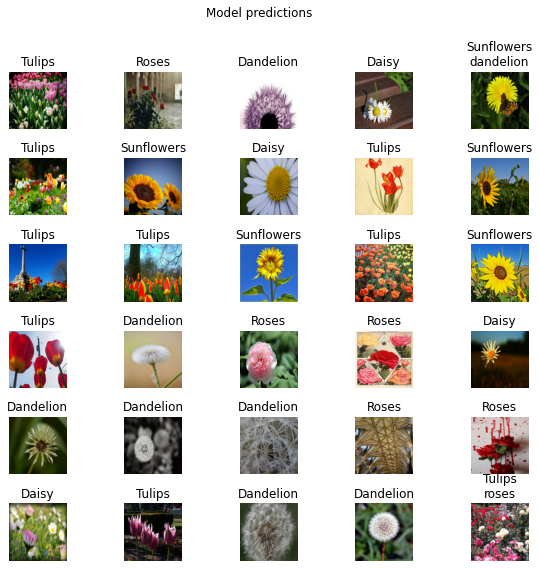

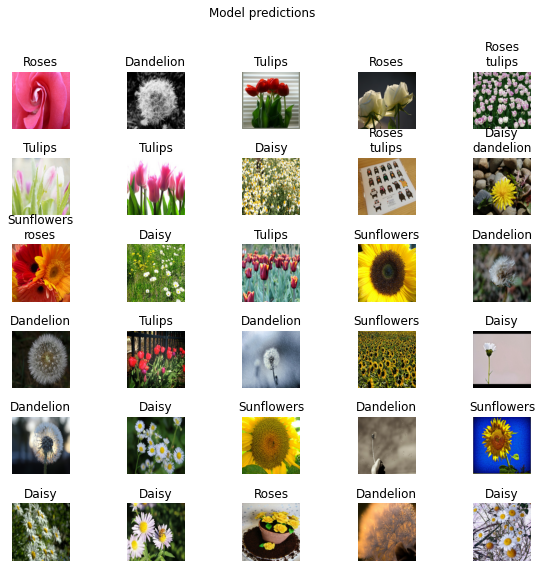

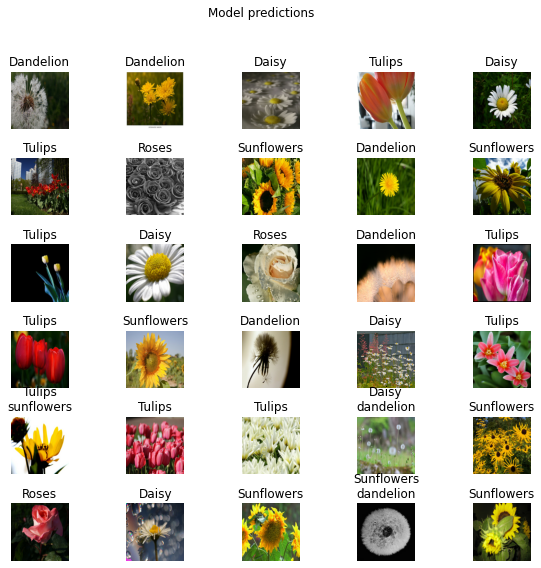

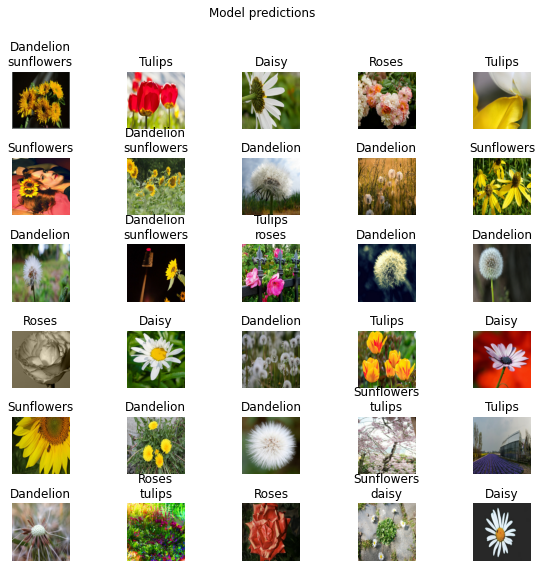

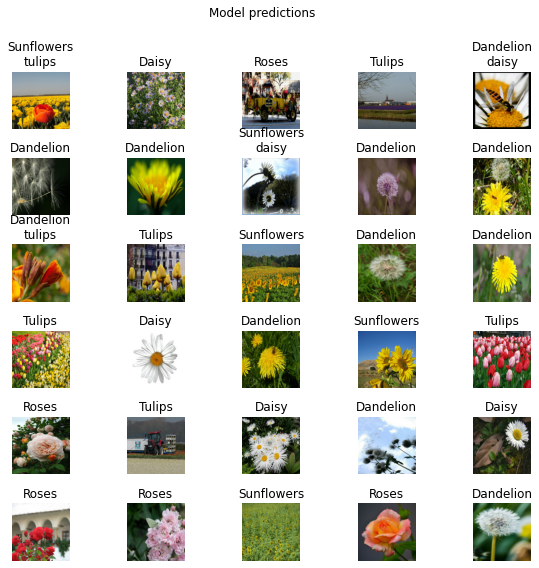

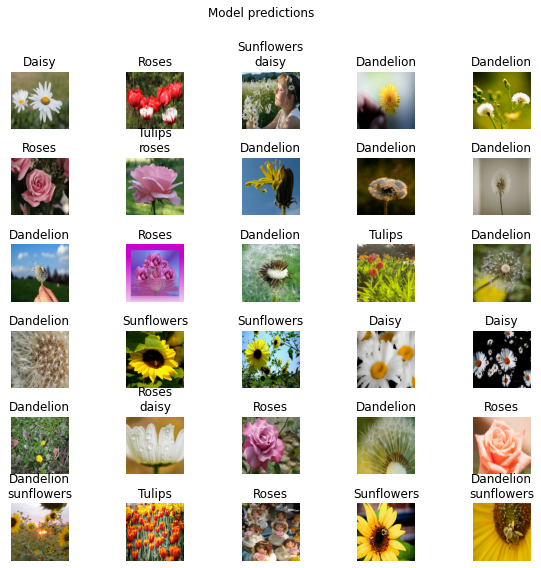

In [128]:
nb_error=0
num_batch=0
num_image=0
nb_image_valid =734

for image_batch, labels in val_ds:
  print(labels)
  predicted_batch = model1_hub.predict(image_batch)
 
  predicted_id = tf.math.argmax(predicted_batch, axis=-1)
  predicted_label_batch = class_names[predicted_id]

  plt.figure(figsize=(10,9))
  plt.subplots_adjust(hspace=0.5)
  
  

  for n in range(30):
    num_image+=1
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    pred= predicted_label_batch[n].title()
    lab =class_names[labels[n]]
    # print("_______________")
    # print( pred  )
    # print(lab)
    if pred.upper()==lab.upper():
      plt.title(pred)
    else:
      plt.title(pred +"\n"+lab)
      nb_error+=1
      print("nb errors",nb_error)
    plt.axis('off')
  _ = plt.suptitle("Model predictions")


  for n in range(30,128):
    num_image+=1
    if  num_image <= nb_image_valid:
      print("_____________________________________")
      print(num_image)
      print(n)
      print("_____________________________________")
      pred= predicted_label_batch[n].title()
      lab =class_names[labels[n]]
      if pred.upper()!=lab.upper():
        nb_error+=1
        print("nb errors",nb_error)
        print("_____________________________________")
  num_batch+=1

In [129]:
print("nb errors",nb_error)
print("taux",round(nb_error/nb_image_valid,2))

nb errors 105
taux 0.14


**on all validation datas with model3 no top dropout**

tf.Tensor(
[4 2 1 0 1 4 3 0 4 3 4 4 3 4 3 4 1 2 2 0 1 1 1 2 2 0 4 1 1 2 1 3 2 0 1 2 2
 3 3 1 1 4 4 1 3 0 0 0 4 4 0 1 4 1 4 4 3 4 0 0 4 4 3 2 4 2 2 4 3 0 1 4 3 1
 1 3 2 2 0 2 4 3 1 1 2 2 4 3 1 4 1 2 3 2 4 0 3 0 2 4 4 1 3 2 4 1 1 1 3 3 4
 1 4 0 3 4 1 3 1 4 1 0 0 0 2 4 0 4], shape=(128,), dtype=int32)
tf.Tensor(
[2 1 4 2 4 4 4 0 4 1 2 0 4 3 1 1 4 1 3 0 1 0 3 1 3 0 0 2 1 0 1 1 4 4 4 2 0
 1 3 4 1 3 4 4 4 0 1 1 1 4 1 1 0 4 2 3 3 2 4 3 1 2 1 4 3 3 1 4 3 0 4 3 3 3
 0 4 4 1 0 4 4 3 4 4 1 3 4 2 1 1 1 1 1 0 2 0 3 3 4 2 4 4 3 3 4 1 4 1 1 3 2
 2 3 1 1 3 3 4 0 3 3 3 4 1 1 1 0 1], shape=(128,), dtype=int32)
tf.Tensor(
[1 1 0 4 0 4 2 3 1 3 4 0 2 1 4 4 3 1 0 4 3 4 4 1 3 2 0 3 1 3 1 3 4 4 0 2 2
 0 0 3 2 0 3 3 1 0 1 3 2 2 4 4 4 0 2 4 0 3 2 4 1 2 0 3 4 1 1 3 1 4 1 4 1 3
 0 3 4 1 0 0 3 4 4 3 4 2 4 4 1 2 1 3 1 3 3 1 1 1 1 1 2 0 3 2 1 1 2 4 2 0 2
 4 0 1 1 1 1 1 3 3 1 0 1 2 1 4 4 4], shape=(128,), dtype=int32)
tf.Tensor(
[3 4 0 2 4 3 3 1 1 3 1 3 2 1 1 2 0 1 4 0 3 1 1 4 4 1 4 2 0 0 3 0 0 1 0 2 1
 0 4 2 0 0 1 0

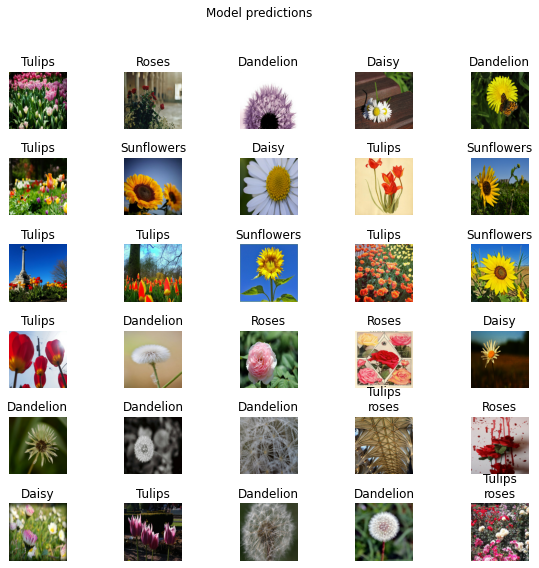

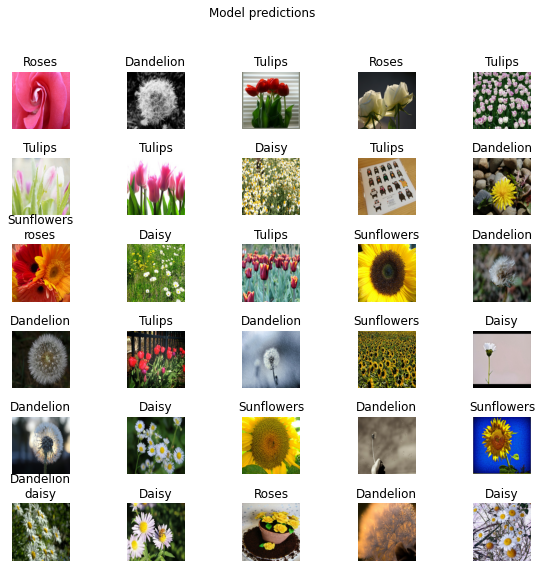

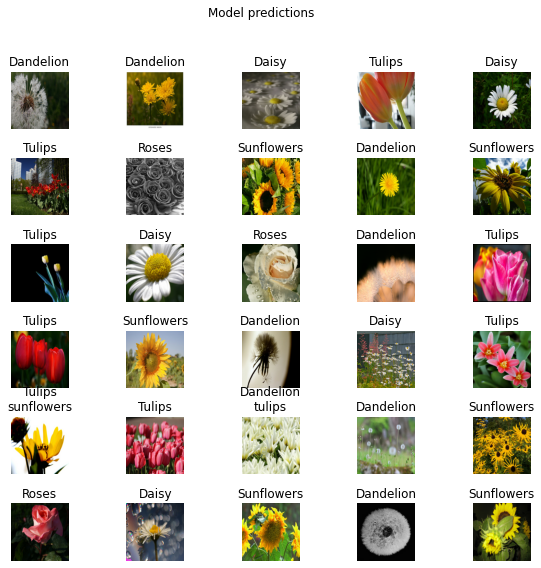

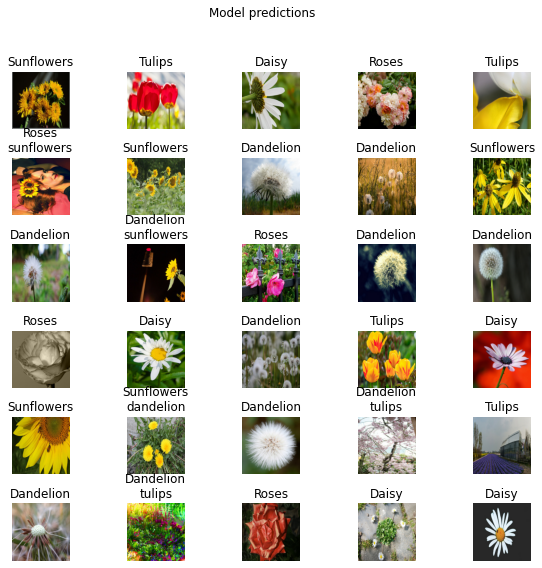

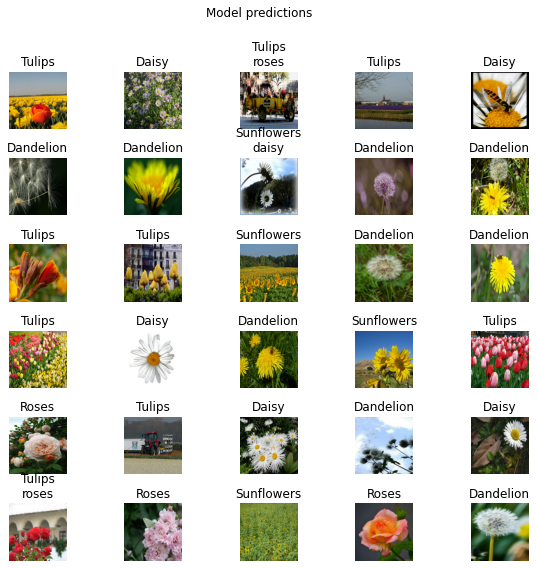

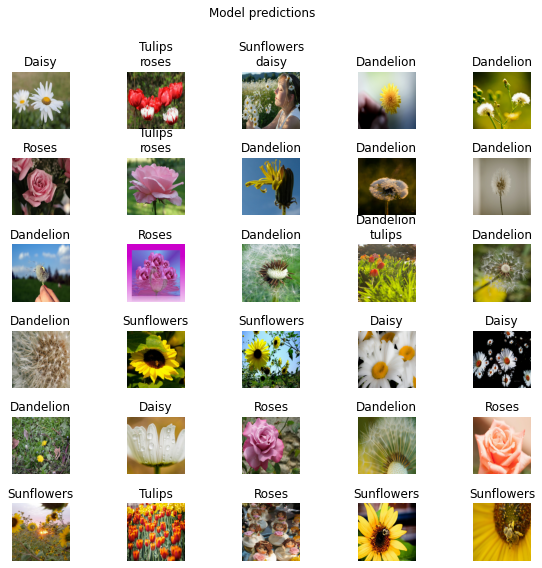

In [130]:
nb_error=0
num_batch=0
num_image=0
nb_image_valid =734

for image_batch3, labels3 in val_ds2:
  print(labels3)
  predicted_batch3 = model3.predict(image_batch3)
 
  predicted_id3 = tf.math.argmax(predicted_batch3, axis=-1)
  predicted_label_batch3 = class_names[predicted_id3]

  plt.figure(figsize=(10,9))
  plt.subplots_adjust(hspace=0.5)
  
  

  for n in range(30):
    num_image+=1
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch3[n])
    pred= predicted_label_batch3[n].title()
    lab =class_names[labels3[n]]
    # print("_______________")
    # print( pred  )
    # print(lab)
    if pred.upper()==lab.upper():
      plt.title(pred)
    else:
      plt.title(pred +"\n"+lab)
      nb_error+=1
      # print("nb errors",nb_error)
    plt.axis('off')
  _ = plt.suptitle("Model predictions")


  for n in range(30,128):
    num_image+=1
    if  num_image <= nb_image_valid:
      # print("_____________________________________")
      # print(num_image)
      # print(n)
      # print("_____________________________________")
      pred= predicted_label_batch3[n].title()
      lab =class_names[labels3[n]]
      if pred.upper()!=lab.upper():
        nb_error+=1
        # print("nb errors",nb_error)
        # print("_____________________________________")
  num_batch+=1

In [131]:
print("nb errors",nb_error)
print("taux",round(nb_error/nb_image_valid,2))

nb errors 64
taux 0.09


**on all validation datas with model4 no top dropout**

tf.Tensor(
[4 2 1 0 1 4 3 0 4 3 4 4 3 4 3 4 1 2 2 0 1 1 1 2 2 0 4 1 1 2 1 3 2 0 1 2 2
 3 3 1 1 4 4 1 3 0 0 0 4 4 0 1 4 1 4 4 3 4 0 0 4 4 3 2 4 2 2 4 3 0 1 4 3 1
 1 3 2 2 0 2 4 3 1 1 2 2 4 3 1 4 1 2 3 2 4 0 3 0 2 4 4 1 3 2 4 1 1 1 3 3 4
 1 4 0 3 4 1 3 1 4 1 0 0 0 2 4 0 4], shape=(128,), dtype=int32)
tf.Tensor(
[2 1 4 2 4 4 4 0 4 1 2 0 4 3 1 1 4 1 3 0 1 0 3 1 3 0 0 2 1 0 1 1 4 4 4 2 0
 1 3 4 1 3 4 4 4 0 1 1 1 4 1 1 0 4 2 3 3 2 4 3 1 2 1 4 3 3 1 4 3 0 4 3 3 3
 0 4 4 1 0 4 4 3 4 4 1 3 4 2 1 1 1 1 1 0 2 0 3 3 4 2 4 4 3 3 4 1 4 1 1 3 2
 2 3 1 1 3 3 4 0 3 3 3 4 1 1 1 0 1], shape=(128,), dtype=int32)
tf.Tensor(
[1 1 0 4 0 4 2 3 1 3 4 0 2 1 4 4 3 1 0 4 3 4 4 1 3 2 0 3 1 3 1 3 4 4 0 2 2
 0 0 3 2 0 3 3 1 0 1 3 2 2 4 4 4 0 2 4 0 3 2 4 1 2 0 3 4 1 1 3 1 4 1 4 1 3
 0 3 4 1 0 0 3 4 4 3 4 2 4 4 1 2 1 3 1 3 3 1 1 1 1 1 2 0 3 2 1 1 2 4 2 0 2
 4 0 1 1 1 1 1 3 3 1 0 1 2 1 4 4 4], shape=(128,), dtype=int32)
tf.Tensor(
[3 4 0 2 4 3 3 1 1 3 1 3 2 1 1 2 0 1 4 0 3 1 1 4 4 1 4 2 0 0 3 0 0 1 0 2 1
 0 4 2 0 0 1 0

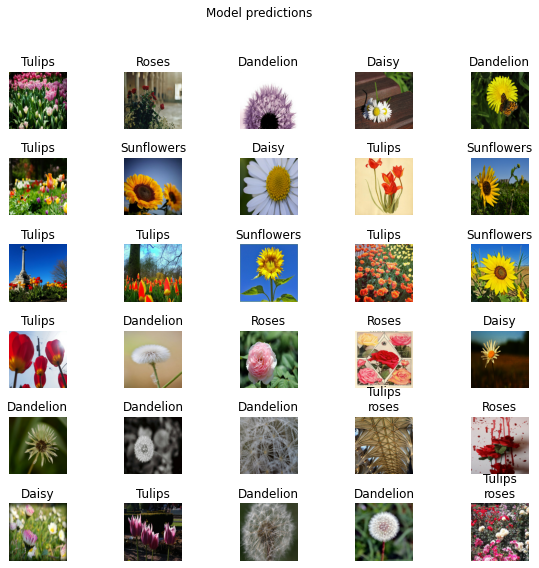

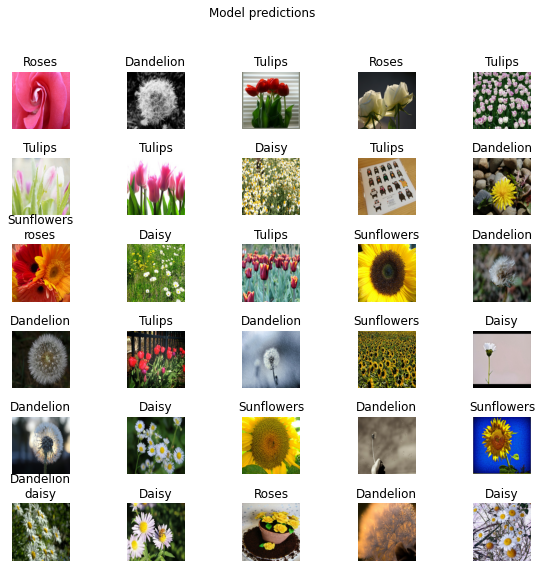

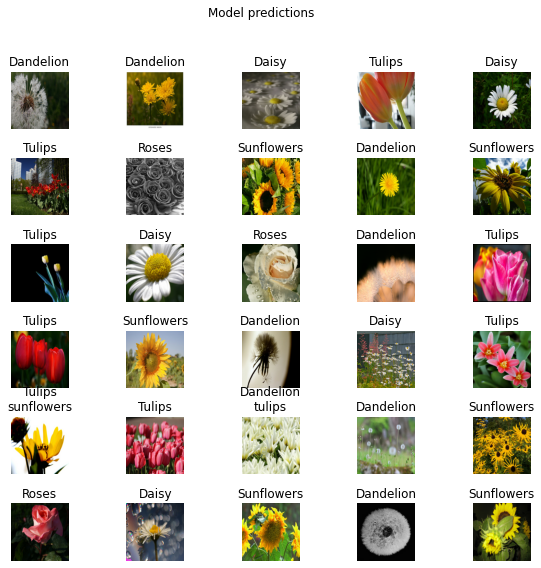

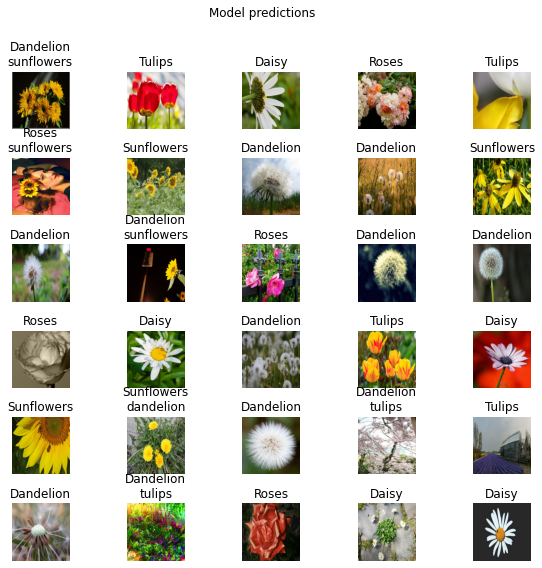

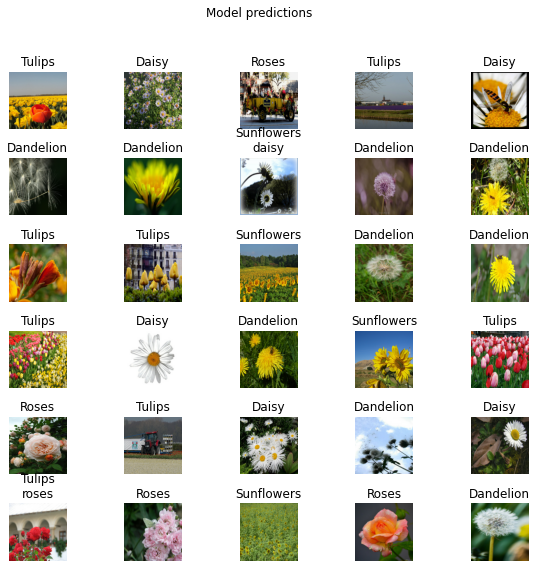

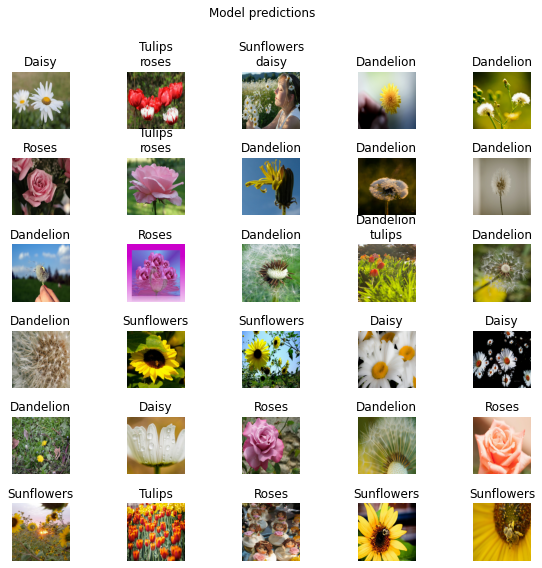

In [132]:
nb_error=0
num_batch=0
num_image=0
nb_image_valid =734

for image_batch4, labels4 in val_ds2:
  print(labels4)
  predicted_batch4 = model4.predict(image_batch4)
 
  predicted_id4 = tf.math.argmax(predicted_batch4, axis=-1)
  predicted_label_batch4 = class_names[predicted_id4]

  plt.figure(figsize=(10,9))
  plt.subplots_adjust(hspace=0.5)
  
  

  for n in range(30):
    num_image+=1
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch4[n])
    pred= predicted_label_batch4[n].title()
    lab =class_names[labels4[n]]
    # print("_______________")
    # print( pred  )
    # print(lab)
    if pred.upper()==lab.upper():
      plt.title(pred)
    else:
      plt.title(pred +"\n"+lab)
      nb_error+=1
      # print("nb errors",nb_error)
    plt.axis('off')
  _ = plt.suptitle("Model predictions")


  for n in range(30,128):
    num_image+=1
    if  num_image <= nb_image_valid:
      # print("_____________________________________")
      # print(num_image)
      # print(n)
      # print("_____________________________________")
      pred= predicted_label_batch4[n].title()
      lab =class_names[labels4[n]]
      if pred.upper()!=lab.upper():
        nb_error+=1
        # print("nb errors",nb_error)
        # print("_____________________________________")
  num_batch+=1

In [133]:
print("nb errors",nb_error)
print("taux",round(nb_error/nb_image_valid,2))

nb errors 64
taux 0.09
